In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.datasets import load_iris
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv('iris.csv')
df.count()
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

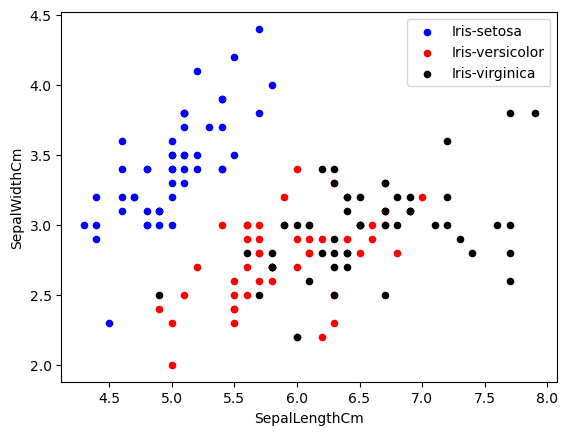

In [14]:
cl1=df[df['Species']=='Iris-setosa'][0:200]
cl2=df[df['Species']=='Iris-versicolor'][0:200]
cl3=df[df['Species']=='Iris-virginica'][0:200]
a=cl1.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='Iris-setosa')
cl2.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='Iris-versicolor',ax=a)
cl3.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='black',label='Iris-virginica',ax=a)




In [45]:
df.dtypes


Id                   int64
SepalLengthCm      float64
SepalWidthCm       float64
PetalLengthCm      float64
PetalWidthCm       float64
Species             object
species_encoded      int64
dtype: object

In [42]:
df['species_encoded'], unique_classes = pd.factorize(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [44]:
feature_df=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X=np.asarray(feature_df)
y=np.asarray(df['species_encoded'])


array([0, 0, 0, 0, 0], dtype=int64)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape # (120,4)
y_train.shape #(120,)
y_test.shape #(30,)
X_test.shape #(30,4)


(30, 4)

In [67]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)

y_predict=classifier.predict(X_test) 
r_squared = r2_score(y_test, y_predict)

print(f"R² Score: {r_squared:.4f}")

R² Score: 0.9572


In [76]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
r2_scores = {}

for kernel in kernels:
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2_scores[kernel] = r2_score(y_test, y_pred)

# Print R² values for each kernel
print("R² Scores for different kernels:")
for kernel, score in r2_scores.items():
    print(f"{kernel}: {score:.4f}")

R² Scores for different kernels:
linear: 0.9572
poly: 0.9572
rbf: 0.9572
sigmoid: -0.0699


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

